In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')


sns.set(font_scale=1.2)

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Cell 2: Define data loading function
def load_imdb_from_local(data_path):
    """
    Load IMDb dataset from local
    """
    def load_split(split_path):
        texts = []
        labels = []
        
        # Load positive reviews
        pos_path = os.path.join(split_path, 'pos', '*.txt')
        for file_path in glob.glob(pos_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(1)  # Positive label is 1
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
        
        # Load negative reviews
        neg_path = os.path.join(split_path, 'neg', '*.txt')
        for file_path in glob.glob(neg_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(0)  # Negative label is 0
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
        
        return pd.DataFrame({'text': texts, 'label': labels})
    
    train_path = os.path.join(data_path, 'train')
    test_path = os.path.join(data_path, 'test')
    
    print("Loading training set...")
    train_df = load_split(train_path)
    print("Loading test set...")
    test_df = load_split(test_path)
    
    print(f"Training set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")
    print(f"Training set label distribution:\n{train_df['label'].value_counts().sort_index()}")
    print(f"Test set label distribution:\n{test_df['label'].value_counts().sort_index()}")
    
    return train_df, test_df

In [3]:
# Cell 3: Define text cleaning function
def clean_text(text):
    """
    改进的文本清洗函数 - 更彻底的清理
    """
    if not isinstance(text, str):
        return ""
    
    # 1. 移除HTML标签
    text = re.sub(r'<.*?>', '', text)
    # 2. 移除URL
    text = re.sub(r'http\S+', '', text)
    # 3. 移除@提及
    text = re.sub(r'@\w+', '', text)
    
    # 4. 小写化
    text = text.lower()
    
    # 5. 处理省略号（多个连续的点）
    text = re.sub(r'\.{2,}', ' ', text)
    
    # 6. 移除所有标点符号，但保留单词内部的连字符和撇号
    # 这个正则表达式会保留字母、数字、空格和单词内部的连字符(-)和撇号(')
    text = re.sub(r'[^\w\s\'-]', ' ', text)
    
    # 7. 处理单词开头或结尾的标点
    # 移除单词开头的标点（连字符和撇号除外）
    text = re.sub(r'\s+[-\']', ' ', text)
    # 移除单词结尾的标点（连字符和撇号除外）
    text = re.sub(r'[-\']\s+', ' ', text)
    
    # 8. 合并多余空格
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [4]:
# Cell 4: Load data
# Modify the path below to your actual IMDb dataset path
data_path = "aclImdb"  # If the dataset is in the aclImdb folder under the current directory

# Check if the path exists
if not os.path.exists(data_path):
    print(f"[ERROR] Path '{data_path}' does not exist, please check the dataset path")
    print("Current working directory:", os.getcwd())
    print("Directory contents:", os.listdir('.'))
else:
    train_df, test_df = load_imdb_from_local(data_path)
    print(" Data loading completed")

Loading training set...
Loading test set...
Training set shape: (25000, 2)
Test set shape: (25000, 2)
Training set label distribution:
0    12500
1    12500
Name: label, dtype: int64
Test set label distribution:
0    12500
1    12500
Name: label, dtype: int64
 Data loading completed


In [5]:
# Cell 5: Apply text cleaning
print("Starting text cleaning...")

# Apply cleaning to training and test sets
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

print(" Text cleaning completed")

# Display comparison before and after cleaning
print("\n Comparison before and after cleaning:")
print("=" * 80)
for i in range(3):
    print(f"\nSample {i+1} (Label: {'Positive' if train_df['label'].iloc[i] == 1 else 'Negative'}):")
    print(f"Original text: {train_df['text'].iloc[i][:100]}...")
    print(f"Cleaned text: {train_df['clean_text'].iloc[i][:100]}...")
    print(f"Length change: {len(train_df['text'].iloc[i])} → {len(train_df['clean_text'].iloc[i])} characters")
    print("-" * 80)

Starting text cleaning...
 Text cleaning completed

 Comparison before and after cleaning:

Sample 1 (Label: Positive):
Original text: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life,...
Cleaned text: bromwell high is a cartoon comedy it ran at the same time as some other programs about school life s...
Length change: 806 → 763 characters
--------------------------------------------------------------------------------

Sample 2 (Label: Positive):
Original text: Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan...
Cleaned text: homelessness or houselessness as george carlin stated has been an issue for years but never a plan t...
Length change: 2366 → 2272 characters
--------------------------------------------------------------------------------

Sample 3 (Label: Positive):
Original text: Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love sc

In [6]:
# Cell 6: Simple tokenization using space split
print("Adding tokenization using space split...")

def tokenize_text(text):
    """Use simple space splitting for tokenization"""
    if not isinstance(text, str):
        return []
    return text.split()

# Apply simple tokenization
train_df['tokens'] = train_df['clean_text'].apply(tokenize_text)
test_df['tokens'] = test_df['clean_text'].apply(tokenize_text)

print("Tokenization completed!")
print(f"Sample tokens: {train_df['tokens'].iloc[0][:10]}...")

# Show example
sample_text = train_df['clean_text'].iloc[0]
print(f"\nExample:")
print(f"Original text: {sample_text[:50]}...")
print(f"Tokens: {train_df['tokens'].iloc[0][:10]}...")

Adding tokenization using space split...
Tokenization completed!
Sample tokens: ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the']...

Example:
Original text: bromwell high is a cartoon comedy it ran at the sa...
Tokens: ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the']...


In [7]:
# Cell 7: Basic statistical analysis
print(" Basic statistical analysis")
print("=" * 50)

# Calculate review length
train_df['length'] = train_df['clean_text'].apply(len)
test_df['length'] = test_df['clean_text'].apply(len)

# Statistics
print("Training set statistics:")
print(f"  Average length: {train_df['length'].mean():.2f} characters")
print(f"  Median length: {train_df['length'].median():.2f} characters")
print(f"  Longest review: {train_df['length'].max()} characters")
print(f"  Shortest review: {train_df['length'].min()} characters")

print("\nTest set statistics:")
print(f"  Average length: {test_df['length'].mean():.2f} characters")
print(f"  Median length: {test_df['length'].median():.2f} characters")
print(f"  Longest review: {test_df['length'].max()} characters")
print(f"  Shortest review: {test_df['length'].min()} characters")

# Statistics by sentiment
print("\nStatistics by sentiment (training set):")
for label in [0, 1]:
    label_data = train_df[train_df['label'] == label]['length']
    print(f"  Label {label} ({'Negative' if label == 0 else 'Positive'}): Average {label_data.mean():.2f} characters")

 Basic statistical analysis
Training set statistics:
  Average length: 1268.11 characters
  Median length: 938.00 characters
  Longest review: 13335 characters
  Shortest review: 51 characters

Test set statistics:
  Average length: 1237.92 characters
  Median length: 921.00 characters
  Longest review: 12311 characters
  Shortest review: 30 characters

Statistics by sentiment (training set):
  Label 0 (Negative): Average 1245.04 characters
  Label 1 (Positive): Average 1291.18 characters


 Data visualization


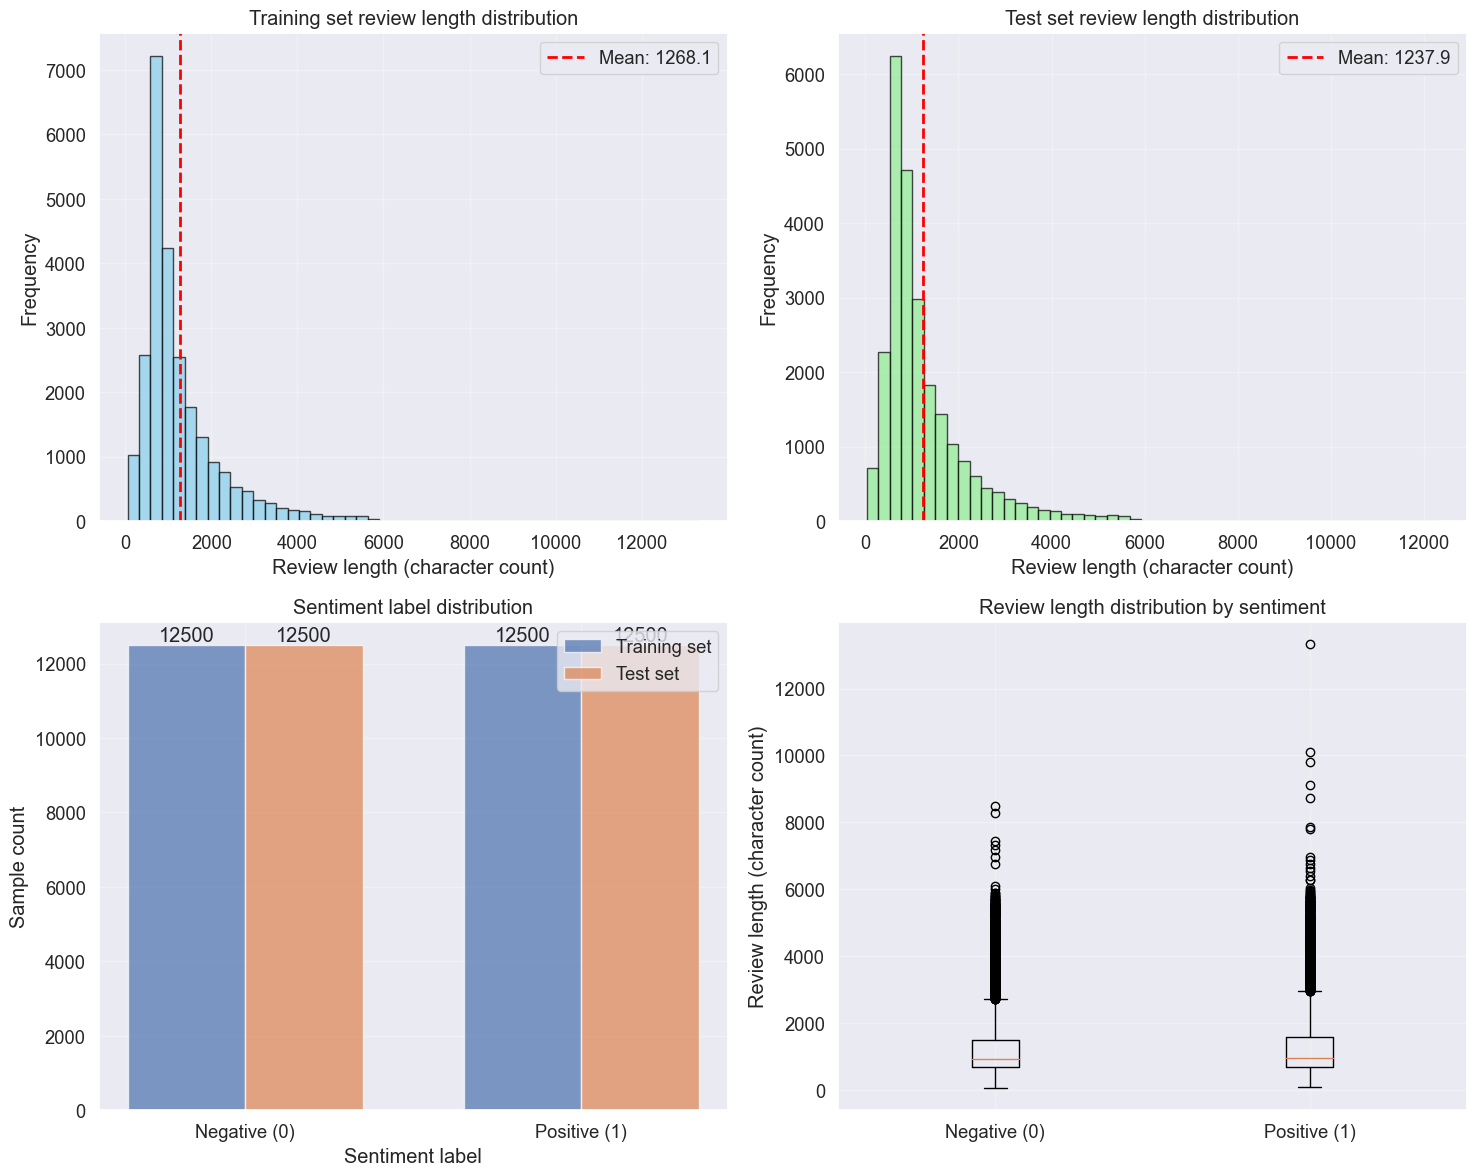

 Visualization completed


In [8]:
# Cell 8: Data visualization
print(" Data visualization")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training set length distribution
axes[0, 0].hist(train_df['length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["length"].mean():.1f}')
axes[0, 0].set_xlabel('Review length (character count)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Training set review length distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Test set length distribution
axes[0, 1].hist(test_df['length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(test_df['length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {test_df["length"].mean():.1f}')
axes[0, 1].set_xlabel('Review length (character count)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Test set review length distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Sentiment label distribution
label_counts_train = train_df['label'].value_counts().sort_index()
label_counts_test = test_df['label'].value_counts().sort_index()

x = np.arange(2)
width = 0.35

axes[1, 0].bar(x - width/2, label_counts_train.values, width, label='Training set', alpha=0.7)
axes[1, 0].bar(x + width/2, label_counts_test.values, width, label='Test set', alpha=0.7)
axes[1, 0].set_xlabel('Sentiment label')
axes[1, 0].set_ylabel('Sample count')
axes[1, 0].set_title('Sentiment label distribution')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Negative (0)', 'Positive (1)'])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(label_counts_train.values):
    axes[1, 0].text(i - width/2, v + 100, str(v), ha='center')
for i, v in enumerate(label_counts_test.values):
    axes[1, 0].text(i + width/2, v + 100, str(v), ha='center')

# 4. Boxplot of review length by sentiment
box_data = [train_df[train_df['label'] == 0]['length'], 
            train_df[train_df['label'] == 1]['length']]
axes[1, 1].boxplot(box_data, labels=['Negative (0)', 'Positive (1)'])
axes[1, 1].set_ylabel('Review length (character count)')
axes[1, 1].set_title('Review length distribution by sentiment')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Visualization completed")

In [9]:
# Cell 9: Save processed data (optional)

save_processed = input("Save processed data? (y/n): ").lower().strip()
if save_processed == 'y':
    train_df.to_csv('imdb_train_processed.csv', index=False)
    test_df.to_csv('imdb_test_processed.csv', index=False)
    print(" Processed data saved as 'imdb_train_processed.csv' and 'imdb_test_processed.csv'")
else:
    print("[error] Data not saved")

print(" Data preprocessing check completed!")
print("\nNext steps recommended:")
print("1. Check data quality and cleaning effect")
print("2. Confirm data distribution meets expectations")
print("3. If satisfied, you can start model training")

Save processed data? (y/n): y
 Processed data saved as 'imdb_train_processed.csv' and 'imdb_test_processed.csv'
 Data preprocessing check completed!

Next steps recommended:
1. Check data quality and cleaning effect
2. Confirm data distribution meets expectations
3. If satisfied, you can start model training


In [10]:
# Cell 10: Build Vocabulary
print("Building vocabulary...")

def build_vocabulary(texts, min_freq=2):
    """
    Build vocabulary from texts
    texts: list of all texts
    min_freq: minimum frequency for words to be included
    """
    from collections import Counter
    
    # Count frequency of all words
    word_counts = Counter()
    for text in texts:
        words = text.split()  # Split by space
        word_counts.update(words)
    
    print(f"Found {len(word_counts)} unique words")
    print(f"Top 10 most frequent words: {word_counts.most_common(10)}")
    
    # Build vocabulary: only keep words with sufficient frequency
    vocab = {}
    index = 2  # Start from 2, 0 and 1 are for special tokens
    
    # Add special tokens
    vocab['<PAD>'] = 0  # Padding token
    vocab['<UNK>'] = 1  # Unknown word token
    
    # Add regular words
    for word, count in word_counts.items():
        if count >= min_freq:
            vocab[word] = index
            index += 1
    
    print(f"Vocabulary size: {len(vocab)} (including {len(vocab)-2} regular words and 2 special tokens)")
    return vocab

# Build vocabulary using training set
vocab = build_vocabulary(train_df['clean_text'].tolist(), min_freq=2)
print("\nVocabulary examples (first 20):")
for i, (word, idx) in enumerate(list(vocab.items())[:20]):
    print(f"  {word}: {idx}")

Building vocabulary...
Found 101812 unique words
Top 10 most frequent words: [('the', 335801), ('and', 163504), ('a', 162649), ('of', 145433), ('to', 135190), ('is', 107245), ('in', 93310), ('it', 78937), ('i', 77053), ('this', 75859)]
Vocabulary size: 53719 (including 53717 regular words and 2 special tokens)

Vocabulary examples (first 20):
  <PAD>: 0
  <UNK>: 1
  bromwell: 2
  high: 3
  is: 4
  a: 5
  cartoon: 6
  comedy: 7
  it: 8
  ran: 9
  at: 10
  the: 11
  same: 12
  time: 13
  as: 14
  some: 15
  other: 16
  programs: 17
  about: 18
  school: 19


In [11]:
# Cell 11: Convert text to numerical sequences
print("Converting text to numerical sequences...")

def text_to_sequence(text, vocab, max_length=None):
    """
    Convert text to numerical sequence
    """
    words = text.split()
    sequence = []
    
    for word in words:
        # If word is in vocabulary, use its index; otherwise use <UNK> token
        sequence.append(vocab.get(word, vocab['<UNK>']))
    
    # Truncate if max_length is specified
    if max_length and len(sequence) > max_length:
        sequence = sequence[:max_length]
    
    return sequence

# Test conversion
sample_text = train_df['clean_text'].iloc[0]
sample_sequence = text_to_sequence(sample_text, vocab)
print(f"Sample text: {sample_text[:100]}...")
print(f"Converted sequence (first 20): {sample_sequence[:20]}")
print(f"Sequence length: {len(sample_sequence)}")

# Apply to all data
train_df['sequence'] = train_df['clean_text'].apply(lambda x: text_to_sequence(x, vocab))
test_df['sequence'] = test_df['clean_text'].apply(lambda x: text_to_sequence(x, vocab))

print("Text to sequence conversion completed!")

Converting text to numerical sequences...
Sample text: bromwell high is a cartoon comedy it ran at the same time as some other programs about school life s...
Converted sequence (first 20): [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Sequence length: 138
Text to sequence conversion completed!


In [13]:
# Cell 12: Handle variable-length sequences (padding)
print("Handling variable-length sequences...")

def pad_sequences(sequences, max_length=None, pad_value=0):
    """
    Pad sequences to the same length
    """
    if max_length is None:
        # If no max_length specified, use the maximum length among all sequences
        max_length = max(len(seq) for seq in sequences)
    
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_length:
            # Pad at the end if sequence is too short
            padded_seq = seq + [pad_value] * (max_length - len(seq))
        else:
            # Truncate if sequence is too long
            padded_seq = seq[:max_length]
        padded_sequences.append(padded_seq)
    
    return padded_sequences, max_length

# Analyze sequence length distribution
sequence_lengths = [len(seq) for seq in train_df['sequence']]
print(f"Sequence length statistics:")
print(f"  Average length: {np.mean(sequence_lengths):.1f}")
print(f"  Median: {np.median(sequence_lengths):.1f}")
print(f"  Maximum: {np.max(sequence_lengths)}")
print(f"  Minimum: {np.min(sequence_lengths)}")

# Choose appropriate sequence length (e.g., 95th percentile)
max_len = int(np.percentile(sequence_lengths, 95))
print(f"\nSelected sequence max length: {max_len} (covers 95% of samples)")

# Perform padding
train_sequences_padded, actual_max_len = pad_sequences(train_df['sequence'].tolist(), max_length=max_len)
test_sequences_padded, _ = pad_sequences(test_df['sequence'].tolist(), max_length=max_len)

# Convert to numpy arrays
X_train = np.array(train_sequences_padded)
X_test = np.array(test_sequences_padded)
y_train = np.array(train_df['label'].tolist())
y_test = np.array(test_df['label'].tolist())

print(f"Padded data shapes:")
print(f"  Training set: {X_train.shape}")
print(f"  Test set: {X_test.shape}")
print(f"  Training labels: {y_train.shape}")
print(f"  Test labels: {y_test.shape}")

# Cell 11.5: Split training set into train and validation sets
print("\n" + "="*50)
print("Splitting training set into train and validation sets...")

from sklearn.model_selection import train_test_split

# Split the training data: 80% for training, 20% for validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Keep the same label distribution
)

print("Dataset splitting completed:")
print(f"  Final training set: {X_train_final.shape}")
print(f"  Validation set: {X_val.shape}")
print(f"  Test set: {X_test.shape}")
print(f"  Final training labels: {y_train_final.shape}")
print(f"  Validation labels: {y_val.shape}")
print(f"  Test labels: {y_test.shape}")

# Check label distribution
print("\nLabel distribution:")
print(f"  Training - Positive: {np.sum(y_train_final==1)}, Negative: {np.sum(y_train_final==0)}")
print(f"  Validation - Positive: {np.sum(y_val==1)}, Negative: {np.sum(y_val==0)}")
print(f"  Test - Positive: {np.sum(y_test==1)}, Negative: {np.sum(y_test==0)}")

Handling variable-length sequences...
Sequence length statistics:
  Average length: 231.6
  Median: 173.0
  Maximum: 2452
  Minimum: 10

Selected sequence max length: 591 (covers 95% of samples)
Padded data shapes:
  Training set: (25000, 591)
  Test set: (25000, 591)
  Training labels: (25000,)
  Test labels: (25000,)

Splitting training set into train and validation sets...
Dataset splitting completed:
  Final training set: (20000, 591)
  Validation set: (5000, 591)
  Test set: (25000, 591)
  Final training labels: (20000,)
  Validation labels: (5000,)
  Test labels: (25000,)

Label distribution:
  Training - Positive: 10000, Negative: 10000
  Validation - Positive: 2500, Negative: 2500
  Test - Positive: 12500, Negative: 12500


Visualizing processing results...


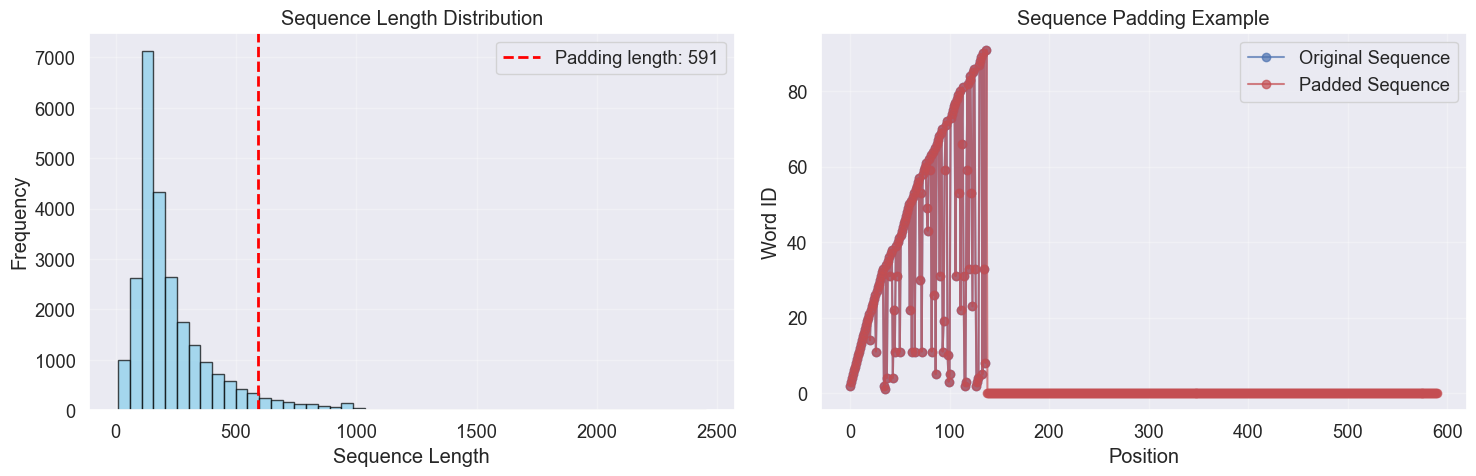


Processing completed!
Original sequence length: 138
Padded sequence length: 591
Padding part: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [14]:
# Cell 13: Visualize processing results
print("Visualizing processing results...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Sequence length distribution
axes[0].hist(sequence_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(max_len, color='red', linestyle='--', linewidth=2, label=f'Padding length: {max_len}')
axes[0].set_xlabel('Sequence Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sequence Length Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Padding example
sample_before = train_df['sequence'].iloc[0]
sample_after = X_train[0]
axes[1].plot(range(len(sample_before)), sample_before, 'bo-', label='Original Sequence', alpha=0.7)
axes[1].plot(range(len(sample_after)), sample_after, 'ro-', label='Padded Sequence', alpha=0.7)
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Word ID')
axes[1].set_title('Sequence Padding Example')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nProcessing completed!")
print(f"Original sequence length: {len(sample_before)}")
print(f"Padded sequence length: {len(sample_after)}")
print(f"Padding part: {sample_after[len(sample_before):]}")